In [27]:
#!pip3 install ray
from Training import model, utils, dataset, train
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [28]:
def test_simulator(circuit, resistor):
    gain = 20 * math.log(abs(-1 * resistor * (49 * math.pow(10, -3) * 0.02302 * circuit / math.pow(10, -6) * 0.2)),10)
    bandwidth = 1/(2 * math.pi * resistor * 348.435)
    return gain, bandwidth

def test_simulator_2(width, resistor):
    
    Cdb = width*(-0.17*width-6.6*10**-7)*500*10**-6+2*(width+(-0.17*width-6.6*10**-7))*500*10**-12
    Cgd = width*0.01917*(-0.00043*width-2.2*10**-8)
    gain = 20*math.log10(abs(-1*(49*10**-3 * 0.01917 * (width/1*10**-6) *0.2)*resistor))
    Cp = (1+gain) * Cgd + Cdb
    bw = 1/(2*math.pi*resistor*Cp)
    return gain, bw

def check_acc(y_hat,y,margin=0.05):
    a_err = (np.abs(y_hat - y)) # get normalized error 
    err = np.divide(a_err, y, out=a_err, where=y==0)
    assert(err.shape == y.shape)
    num_correct = 0
    for row in err:
        num_in_row = len(np.where(row < margin)[0]) # margin * 100 because 
        if num_in_row == len(row):
            num_correct += 1

    num_samples = y.shape[0]
    correct_idx = np.where(err < margin)
    num_part_correct = len(correct_idx[0])
    num_part_samples = y.shape[0] * y.shape[1]
    print(f"Correct = {num_correct} / {num_samples}")
    return (num_correct/num_samples)

In [29]:
data = np.array(utils.parseGainAndBWCsv2('Data/BW-3000.csv')).reshape(-1,4)
# data1 = np.array(utils.parseGainAndBWCsv('Data/BW_Gain322.csv')).reshape(-1,4)
# data2 = np.array(utils.parseGainAndBWCsv('Data/BW_Gain324.csv')).reshape(-1,4)
# data3 = np.array(utils.parseGainAndBWCsv('Data/BW_Gain324_1.csv')).reshape(-1,4)

#data = np.vstack((data,data1,data2,data3))
#n = np.random.randint(0,data.shape[0],(50))
#data = data[n, :]
print(data[:5])
data = preprocessing.MinMaxScaler((0,1)).fit_transform(data) #normalize(data, norm='max', axis=0, copy=True, return_norm=False)
print(data[:5])

div = -data[:,3]#np.array(data[:,3] / data[:,2]).T
div2 = -data[:,2]#np.array(data[:,2] / data[:,3]).T
# prod = np.array(data[:,2] * data[:,3]).T
#sin1 = data[:,2]**2
#sin2 = data[:,3]**2

print(div.shape,)#prod.shape,sin1.shape,sin2.shape)
X = data[:,:2] # tran res
Y = data[:,2:]#np.vstack((data[:,2:].T,div,div2)).T
#X, Y = make_regression(668,2,n_informative=0, n_targets=2)
# X= preprocessing.MinMaxScaler((0,1)).fit_transform(X)
# Y= preprocessing.MinMaxScaler((0,1)).fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y)

print(y_train.min())
print(y_train.max())

print(X_train.shape)
print(y_train.shape)

[['2.88e-06' '620' '3.775' '82800000000.0']
 ['3.07e-06' '620' '4.23' '77000000000.0']
 ['3.26e-06' '620' '4.652' '72000000000.0']
 ['3.44e-06' '620' '5.046' '67700000000.0']
 ['3.63e-06' '620' '5.414' '63900000000.0']]
[[0.         0.         0.50319101 0.74556213]
 [0.05066667 0.         0.54408989 0.65976331]
 [0.10133333 0.         0.58202247 0.58579882]
 [0.14933333 0.         0.6174382  0.52218935]
 [0.2        0.         0.65051685 0.46597633]]
(3022,)
0.0
1.0
(2266, 2)
(2266, 2)


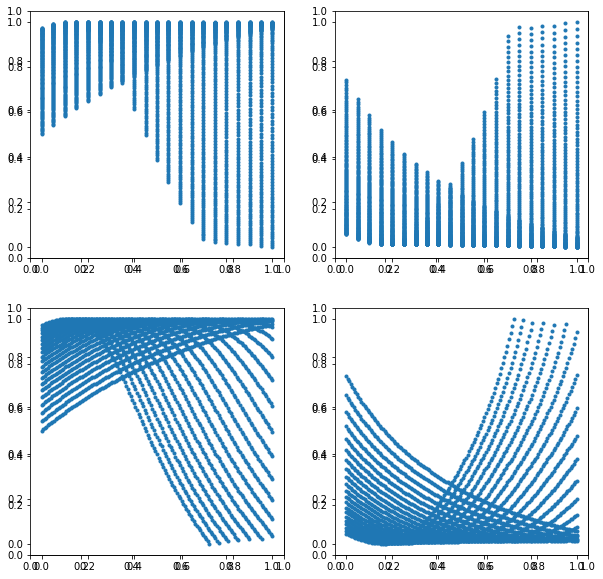

In [30]:
fig, axes = plt.subplots(2,2, figsize = (10,10))
ax = fig.add_subplot(221)
plt.plot(X[:,0],Y[:,0], ".")
ax = fig.add_subplot(222)
plt.plot(X[:,0],Y[:,1], ".")
ax = fig.add_subplot(223)
plt.plot(X[:,1],Y[:,0], ".")
ax = fig.add_subplot(224)
plt.plot(X[:,1],Y[:,1], ".")

In [31]:
custom_data = []
rmin = X[0].min()
rmax = X[0].max()

tmin = X[1].min()
tmax = X[1].max()

# for i in range(5000):
#     t = np.random.uniform(tmin,tmax)
#     r = np.random.uniform(rmin,rmax)
    
#     g,b = test_simulator_2(t,r)
    
#     custom_data.append([t,r,g,b])
#for i in X
custom_data = np.array(custom_data)

In [32]:
# custom_data = preprocessing.normalize(custom_data, norm='max', axis=0, copy=True, return_norm=False)

# print(np.array(custom_data).shape)
# X1 = custom_data[:,:2]
# Y1 = custom_data[:,2:]

# X_train1, X_test1, y_train1, y_test1 = train_test_split(Y1, X1)


In [33]:
model = tf.keras.models.Sequential([])
for i in range(1):
    model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))

In [34]:
loss_fn = tf.keras.losses.MeanAbsoluteError()

optim = tf.keras.optimizers.Adam(
    learning_rate=0.001)
model.compile(optimizer=optim,
              loss=loss_fn,
              metrics=['mean_absolute_error'])

In [35]:
model.fit(X_train, y_train, epochs=1000, batch_size= 700, validation_data=(X_test, y_test))

Epoch 1/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.4571 - mean_absolute_error: 0.4571 - val_loss: 0.4323 - val_mean_absolute_error: 0.4323
Epoch 2/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.4276 - mean_absolute_error: 0.4276 - val_loss: 0.3975 - val_mean_absolute_error: 0.3975
Epoch 3/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3944 - mean_absolute_error: 0.3944 - val_loss: 0.3646 - val_mean_absolute_error: 0.3646
Epoch 4/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.3630 - mean_absolute_error: 0.3630 - val_loss: 0.3346 - val_mean_absolute_error: 0.3346
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3340 - mean_absolute_error: 0.3340 - val_loss: 0.3070 - val_mean_absolute_error: 0.3070
Epoch 6/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - val_loss: 0.2823 - val_mean_absolute_error: 0.2823
Epoch 7/1000
4/4 [========

0.0030415456276386976


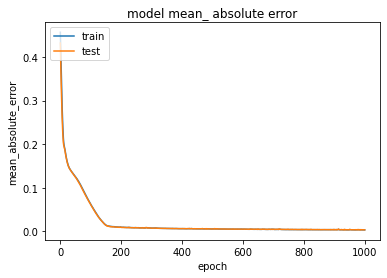

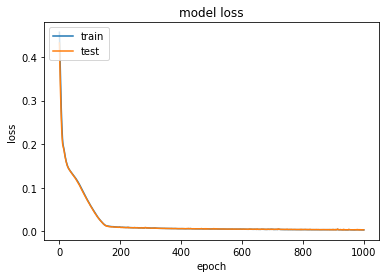

In [36]:
history = model.history
print(history.history['val_loss'][-1])
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_ absolute error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

/tmp/ipykernel_23826/878701472.py:13: RuntimeWarning: invalid value encountered in true_divide
  err = np.divide(a_err, ytr, out = a_err, where = ytr ==0  )
/tmp/ipykernel_23826/878701472.py:24: RuntimeWarning: invalid value encountered in true_divide
  err = np.divide(a_err, yte, out = a_err, where = yte ==0  )
/tmp/ipykernel_23826/3542808140.py:17: RuntimeWarning: invalid value encountered in true_divide
  err = np.divide(a_err, y, out=a_err, where=y==0)


[[1.93281313e-04 3.64992657e-03]
 [5.59527300e-03 7.26367330e-04]
 [7.02054795e-05 5.32588552e-04]
 ...
 [3.30017733e-03 5.93117267e-04]
 [1.19996023e-04 7.64902395e-04]
 [4.45243246e-03 4.50780106e-03]]
Training
Correct = 2259 / 2266
0.9969108561341571
Testing
Correct = 754 / 756
0.9973544973544973
[0.0, 1.0] [0.0, 1.0]


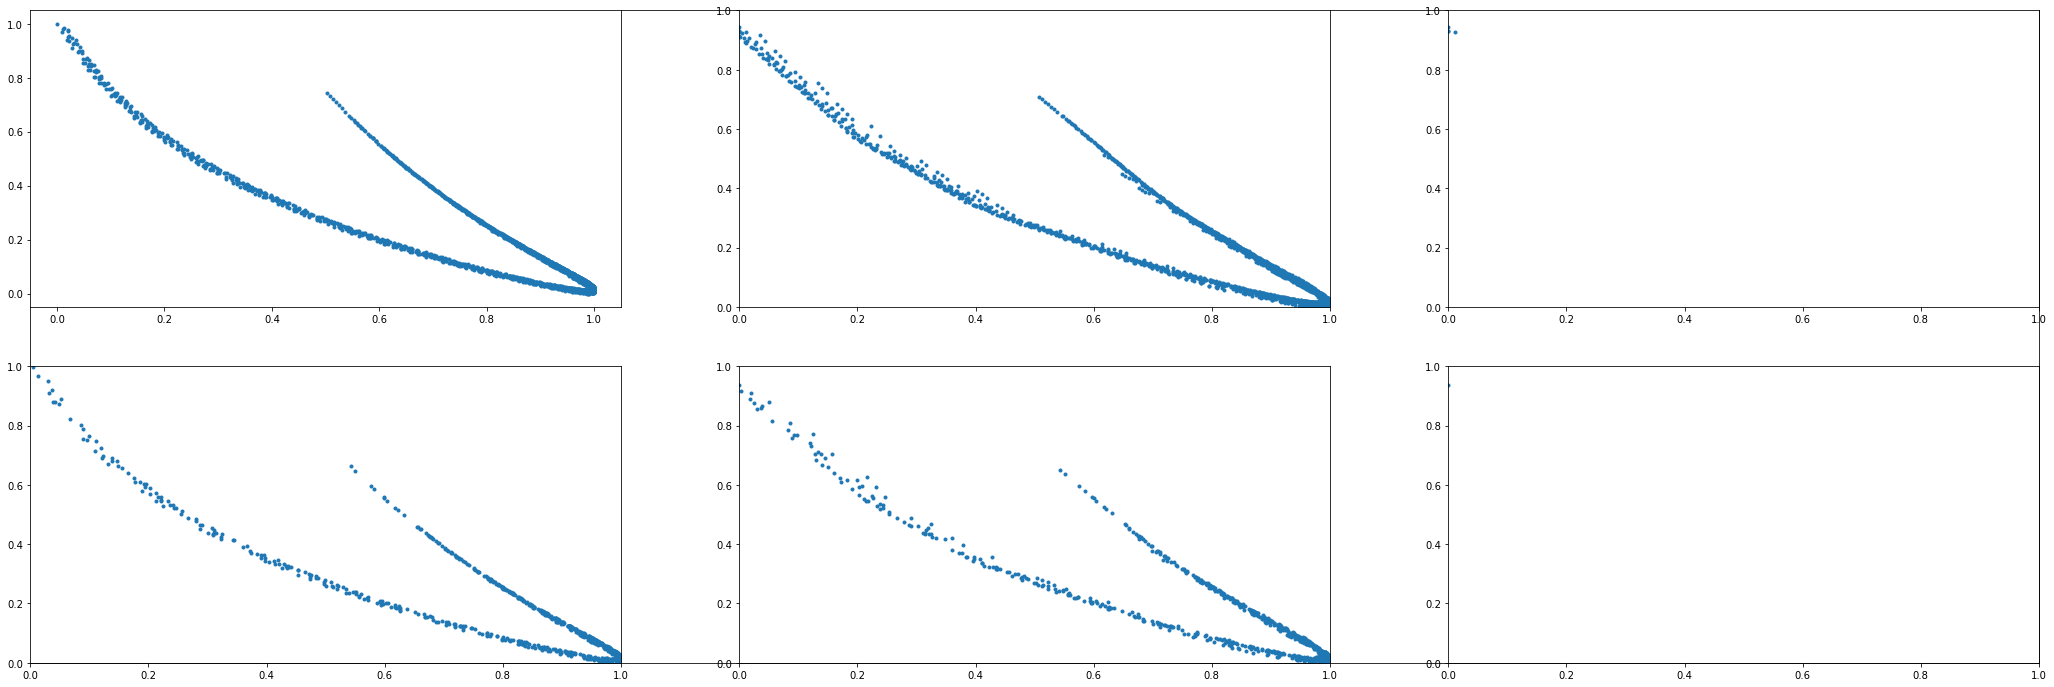

In [37]:
margin = 0.05

xtr = X_train
xte= X_test

ytr = y_train
yte = y_test

preds = model.predict(xtr)
preds_2 = model.predict(xte)

a_err = np.abs(preds - ytr)
err = np.divide(a_err, ytr, out = a_err, where = ytr ==0  )
pc1 = len(np.where(err < margin)[0])
print(a_err)
w_pred = []
for i,row in enumerate(err):
    if np.any(row > margin):
        w_pred.append(preds[i])
w_pred = np.array(w_pred)


a_err = np.abs(preds_2 - yte)
err = np.divide(a_err, yte, out = a_err, where = yte ==0  )
pc2 = len(np.where(err < margin)[0])

w_pred_2 = []
for i,row in enumerate(err):
    if np.any(row > margin):
        w_pred_2.append(preds_2[i])
w_pred_2 = np.array(w_pred_2)


print("Training")
print(check_acc(preds,ytr))
print("Testing")
print(check_acc(preds_2,yte))

xlim = [ytr[:,0].min(),ytr[:,0].max()]
ylim = [ytr[:,1].min(),ytr[:,1].max()]
print(xlim,ylim)
fig, axes = plt.subplots(figsize=(36, 12))
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
ax = fig.add_subplot(231)
plt.plot(ytr[:,0],ytr[:,1], ".")
ax = fig.add_subplot(232)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.plot(preds[:,0],preds[:,1], ".")
ax = fig.add_subplot(233)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.plot(w_pred[:,0],w_pred[:,1], ".")
ax = fig.add_subplot(234)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.plot(yte[:,0],yte[:,1], ".")
ax = fig.add_subplot(235)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.plot(preds_2[:,0],preds_2[:,1], ".")
ax = fig.add_subplot(236)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.plot(w_pred_2[:,0],w_pred_2[:,1], ".")

plt.show()

In [38]:
model.save('saved_model/mock_simulator')

2022-04-23 23:52:14.917388: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/mock_simulator/assets


In [ ]:
psuedo_X = preprocessing.MinMaxScaler((0,1)).fit_transform(np.random.uniform(size = (10000,2)))
preds = model.predict(psuedo_X)

dist = []
for i in range(psuedo_X.shape[0]):
    dist.append(np.linalg.norm(psuedo_X[0] - psuedo_X[i]))

fig, axes = plt.subplots(figsize=(36, 12))
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
ax = fig.add_subplot(121)
plt.scatter(psuedo_X[:,0],psuedo_X[:,1],c = dist, marker = ".")
ax = fig.add_subplot(122)
plt.scatter(preds[:,0],preds[:,1],c = dist, marker = ".")

pseudo_data = np.hstack((psuedo_X,preds))
print(pseudo_data.shape)

In [ ]:
dist = []
for i in range(X_train.shape[0]):
    dist.append(np.linalg.norm(X_train[0] - X_train[i]))

fig, axes = plt.subplots(figsize=(36, 12))
ax = fig.add_subplot(121)
plt.scatter(X_train[:,0],X_train[:,1],c = dist, marker = ".")
ax = fig.add_subplot(122)
plt.scatter(y_train[:,0],y_train[:,1],c = dist, marker = ".")

In [ ]:
fig, axes = plt.subplots(figsize=(36, 12))
axes.axis('off')
ax = fig.add_subplot(121)
plt.plot(Y[:,0],Y[:,1], ".")
ax = fig.add_subplot(122)
plt.plot(X[:,0],X[:,1], ".")


In [ ]:
A = np.ones((2,3))*4
B = np.ones((3,2))*3

#I = np.array([2,3,4]).reshape(1,3)
#T = I@A@B

Ai = np.linalg.pinv(A)
Bi = np.linalg.pinv(B)


AB = A@B
BiAi = Ai@AB

print(B)
print(BiAi)


In [ ]:
len(model.weights)
for i in model.weights:
    print(i.shape)

In [ ]:
print(model.summary())